 <h1>REGRESSIONS  AND TIME SERIES PROJECT</h1> 

In this project we will be working with a fake absenteeism at work data set, indicating whether or not a particular employee will 'Hit target'. We will try to create a model that will predict whether or not they will hit the target based off the features of that employee.

This data set contains the following features:
* Reason for absence                 
* Month of absence                   
* Day of the week                    
* Seasons                            
* Transportation expense             
* Distance from Residence to Work    
* Service time                       
* Age                                
* Work load Average/day              
* Hit target                         
* Disciplinary failure               
* Education                          
* Son                                
* Social drinker                     
* Social smoker                      
* Pet                                
* Weight                             
* Height                             
* Body mass index                    
* Absenteeism time in hours 


## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('Absenteeism_at_work.xls')

In [3]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null int64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                            

# Exploratory Data Analysis

* For the rest of the exercise we'll only be using the numerical data of the csv file.
**Use seaborn to create a jointplot to compare the Number children an employee has and the Absenteeism time in hours columns. Does the correlation make sense?**


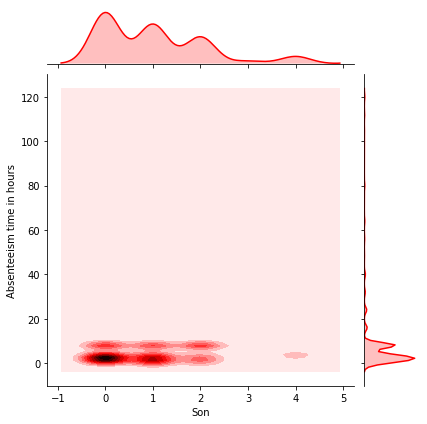

In [6]:
sns.jointplot(x='Son', y='Absenteeism time in hours', data=df, color='red', kind='kde')

In [7]:
#sns.jointplot(x='Transportation expense', y='Hit target', data=df, color='red', kind='kde')

# Creating a countplot for the group age of employees

Text(0.5, 0, 'Age')

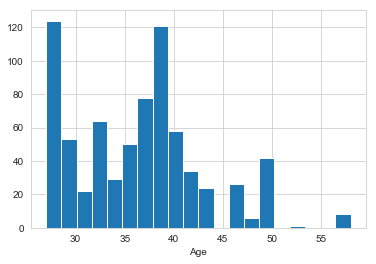

In [8]:
sns.set_style('whitegrid')
df['Age'].hist(bins=20)
plt.xlabel('Age')

In [ ]:
#sns.pairplot(df,hue='Disciplinary failure',palette='bwr')

In [ ]:
#plt.show()

In [ ]:
#sns.jointplot(x='Service time',y='Hit target',data=df)

# Creating a count plot for the reasons of absence

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text yticklabel objects>)

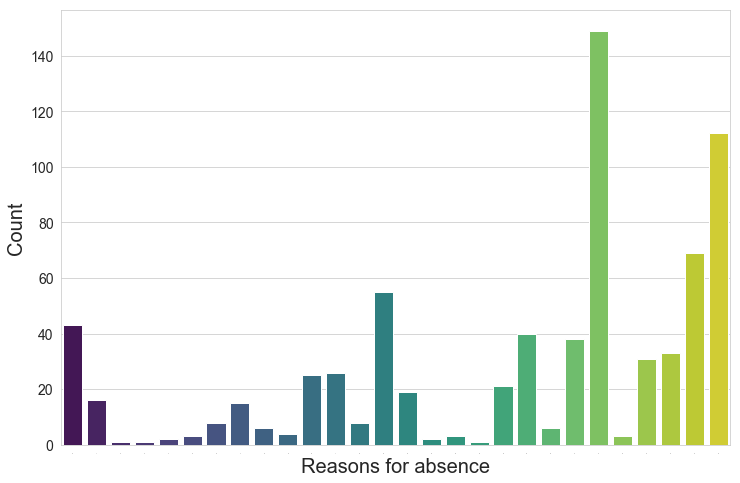

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x='Reason for absence',data=df,palette='viridis')
plt.xlabel('Reasons for absence', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=1)
plt.yticks(fontsize=14)

## Interpretation of some reasons of absence
* medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28)



# Creating new features

In [ ]:
# df['Month'] = pd.to_datetime(df['Month of absence'])
# df['Day of Week'] = pd.to_datetime(df['Day of Week'])

In [ ]:
#df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
# df['Month'] = df['Month of absence'].apply(lambda time: time.month)
# df['Day of Week'] = df['Day of the week'].apply(lambda time: time.dayofweek)

In [ ]:
#dmap = {1:'Sun',2:'Mon',3:'Tue',4:'Wed',5:'Thu',6:'Fri'}

In [ ]:
#df['Day of the week'] = df['Day of the week'].map(dmap)

In [ ]:
#dmap = {1:'summer',2:'autumn',3:'winter',4:'spring'}

In [10]:
df['Absenteeism time in hours '] = pd.to_numeric(df['Absenteeism time in hours'])

In [12]:
#df['Seasons'] = df['Seasons'].map(dmap)

In [13]:
df.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,4,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,0,0,98,178,31,0,0
2,3,23,7,4,1,179,51,18,38,239554,...,1,0,1,0,0,89,170,31,2,2
3,7,7,7,5,1,279,5,14,39,239554,...,1,2,1,1,0,68,168,24,4,4
4,11,23,7,5,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,2,2
5,3,23,7,6,1,179,51,18,38,239554,...,1,0,1,0,0,89,170,31,2,2
6,10,22,7,6,1,361,52,3,28,239554,...,1,1,1,0,4,80,172,27,8,8
7,20,23,7,6,1,260,50,11,36,239554,...,1,4,1,0,0,65,168,23,4,4
8,14,19,7,2,1,155,12,14,34,239554,...,1,2,1,0,0,95,196,25,40,40
9,1,22,7,2,1,235,11,14,37,239554,...,3,1,0,0,1,88,172,29,8,8


In [15]:
df.columns = ['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Absent ']

In [17]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absent
0,11,26,7,3,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,4,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,0,0,98,178,31,0,0
2,3,23,7,4,1,179,51,18,38,239554,...,1,0,1,0,0,89,170,31,2,2
3,7,7,7,5,1,279,5,14,39,239554,...,1,2,1,1,0,68,168,24,4,4
4,11,23,7,5,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,2,2


In [22]:
df_two_vars = df[['Day of the week','Absenteeism time in hours']]

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 9 Text yticklabel objects>)

<Figure size 1152x864 with 0 Axes>

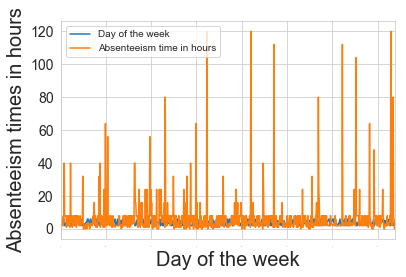

In [23]:

plt.figure(figsize=(16,12))
df_two_vars.plot()
plt.xlabel('Day of the week', fontsize=20)
plt.ylabel('Absenteeism times in hours', fontsize=20)
plt.xticks(fontsize=1)
plt.yticks(fontsize=14)

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

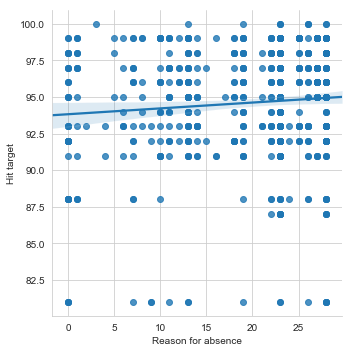

In [26]:
sns.lmplot(x='Reason for absence',y='Hit target',data=df)

## Training and Testing Data
Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [27]:
y = df['Hit target']

In [35]:
X = ['Reason for absence', 'Month of absence', 'Day of the week','Seasons']

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
advertising = pd.read_csv('advertising.csv')

In [40]:
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
advertising.head()